In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize , MinMaxScaler , StandardScaler

In [2]:
df = pd.read_csv("Student_Performance.csv")

In [3]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [4]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [6]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [7]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [8]:
df.describe(include=object)

,Extracurricular Activities
count,10000
unique,2
top,No
freq,5052


<Axes: xlabel='Extracurricular Activities', ylabel='count'>

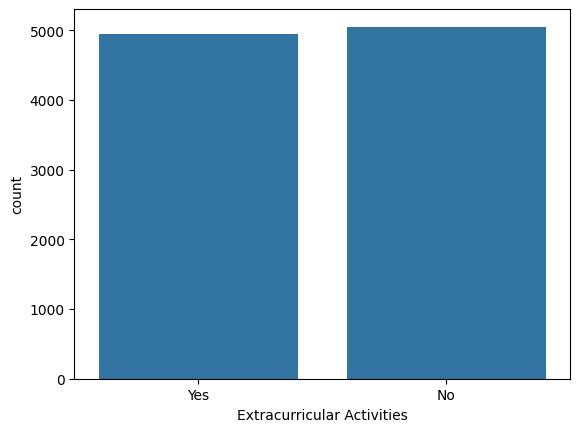

In [9]:
sns.countplot(x=df["Extracurricular Activities"])

In [10]:
Best = df[(df["Extracurricular Activities"] == "Yes") & (df["Sleep Hours"]<5) & (df["Hours Studied"] >6 )]

In [11]:
weak = df[(df["Extracurricular Activities"] == "No") & (df["Sleep Hours"]>8) & (df["Hours Studied"] <6 )]

In [12]:
(weak.shape[0] / df.shape[0]) *100

4.590000000000001

In [13]:
(Best.shape[0] / df.shape[0]) *100

2.58

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
Encoder = LabelEncoder()

In [16]:
df[ "Extracurricular Activities"] = Encoder.fit_transform(df["Extracurricular Activities"])

In [17]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [18]:
df.corr()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.012390,0.003873,0.001245,0.017463,0.373730
Previous Scores,-0.012390,1.000000,0.008369,0.005944,0.007888,0.915189
Extracurricular Activities,0.003873,0.008369,1.000000,-0.023284,0.013103,0.024525
Sleep Hours,0.001245,0.005944,-0.023284,1.000000,0.003990,0.048106
Sample Question Papers Practiced,0.017463,0.007888,0.013103,0.003990,1.000000,0.043268
Performance Index,0.373730,0.915189,0.024525,0.048106,0.043268,1.000000


<Axes: >

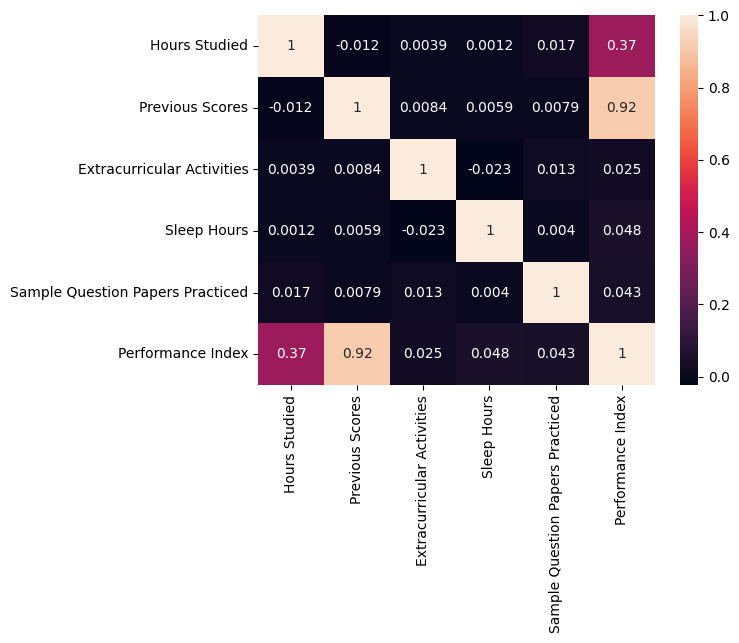

In [19]:
sns.heatmap(df.corr() , annot=True )

In [20]:
df.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities            int32
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

<Axes: xlabel='Hours Studied', ylabel='count'>

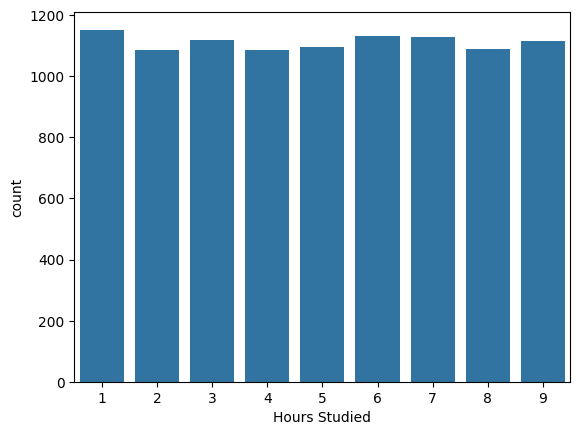

In [21]:
sns.countplot(x=df["Hours Studied"])

<Axes: xlabel='Performance Index', ylabel='Count'>

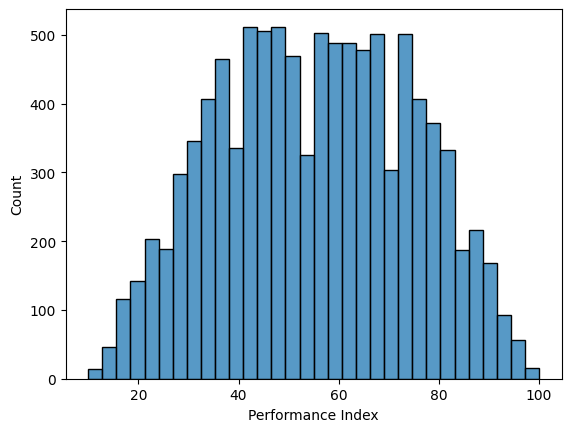

In [22]:
sns.histplot(x=df["Performance Index"])

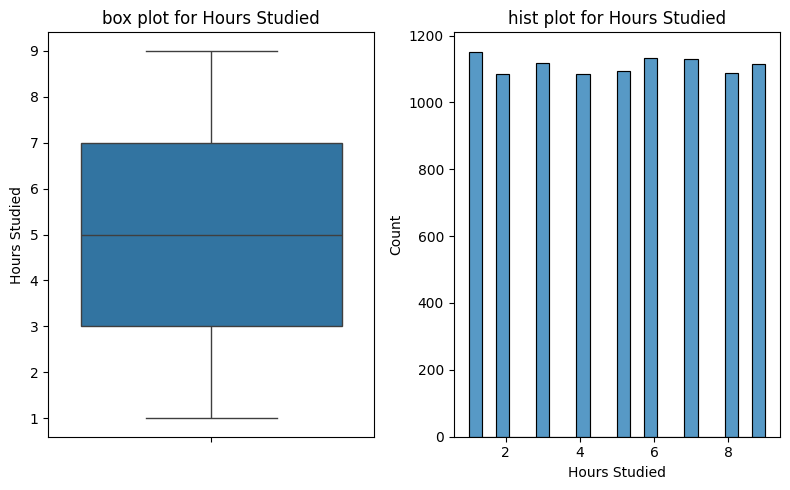

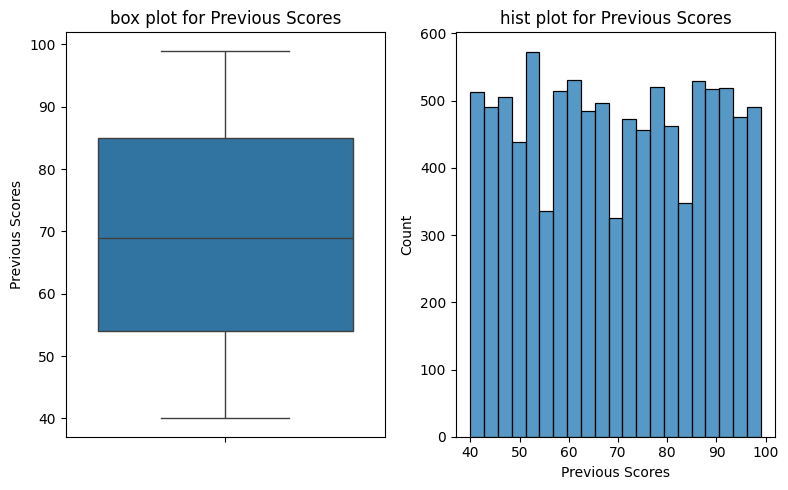

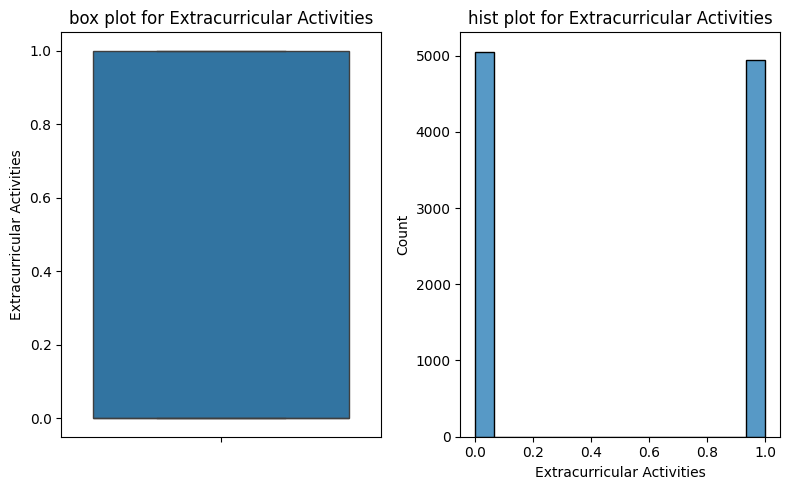

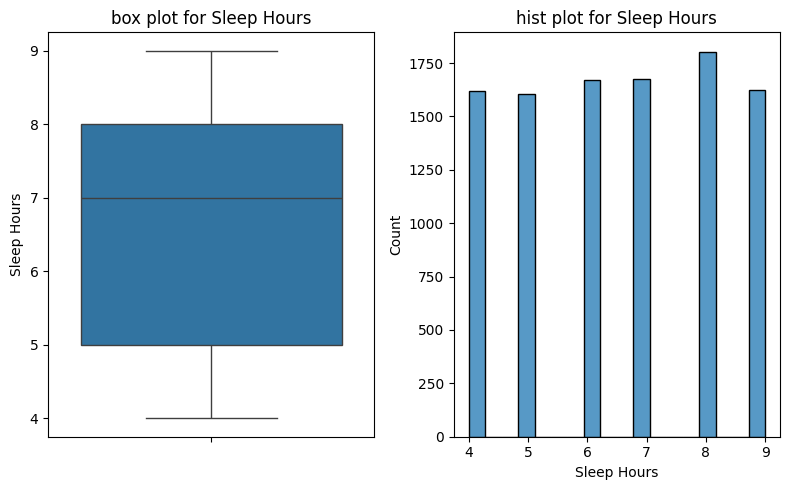

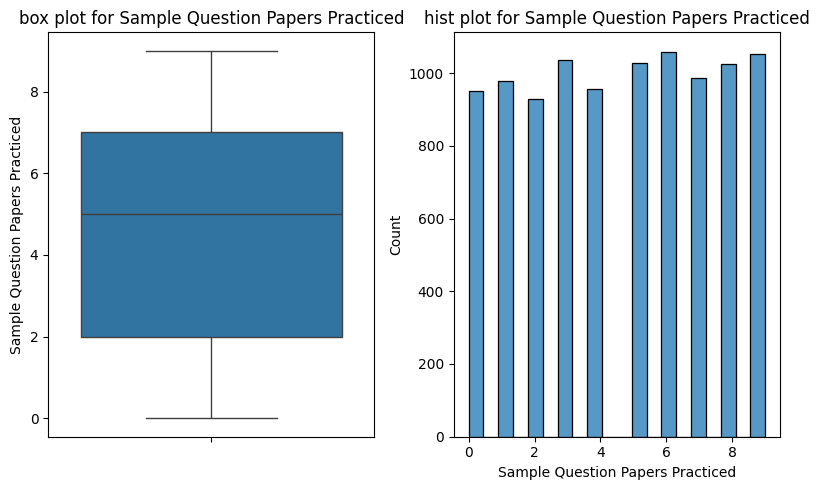

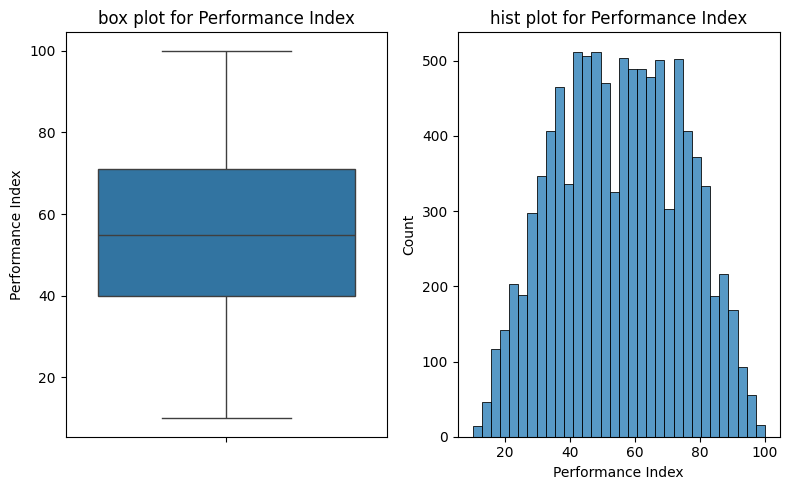

In [23]:
for i in df:
    fig , x = plt.subplots(ncols=2, figsize=(8,5))
    sns.boxplot(ax=x[0] , y=df[i])
    sns.histplot(ax=x[1] , x=df[i])
    x[0].set(title=f"box plot for {i}")
    x[1].set(title=f"hist plot for {i}")
    plt.tight_layout()
    plt.show()

In [24]:
x = df.drop("Performance Index" , axis=1)
y = df["Performance Index"]

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train , x_test , y_train , y_test = train_test_split ( x , y , random_state=42)

In [84]:
x_test

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
6252,5,69,0,8,2
4684,2,46,1,4,8
1731,7,56,1,7,5
4742,6,42,1,8,5
4521,7,53,0,4,6
...,...,...,...,...,...
4862,6,94,0,6,4
7025,2,56,0,6,2
7647,5,81,0,8,8
7161,4,72,0,5,3


In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [28]:
LR = LinearRegression()
Knn = KNeighborsRegressor()

In [29]:
LR.fit(x_train , y_train)

LinearRegression()

In [30]:
LR.score(x_train, y_train) , LR.score(x_test, y_test)

(0.9886395368813107, 0.9890550757439104)

In [31]:
Knn.fit(x_train , y_train)

KNeighborsRegressor()

In [32]:
Knn.score(x_train , y_train) , Knn.score(x_test, y_test)

(0.988810195609433, 0.9839507833228293)

#### Evaluation

In [34]:
from sklearn.metrics import mean_absolute_error , mean_squared_error

In [35]:
y_hat_LR = LR.predict(x_test)
y_hat_Knn = Knn.predict(x_test)

In [36]:
mean_absolute_error(y_test , y_hat_LR)

1.5975792091646104

In [37]:
mean_squared_error(y_test , y_hat_LR)

4.032544215419114

In [38]:
mean_absolute_error(y_test , y_hat_Knn)

1.9412

In [39]:
mean_squared_error(y_test , y_hat_Knn)

5.913168000000001